In [9]:
import board
import busio
import digitalio
spi = busio.SPI(board.SCK, MOSI=board.MOSI, MISO=board.MISO)
cs = digitalio.DigitalInOut(board.CE1)
reset = digitalio.DigitalInOut(board.D25)

import adafruit_rfm9x
import time

rfm9x = adafruit_rfm9x.RFM9x(spi, cs, reset, 915.0)
print(rfm9x.ack_retries, rfm9x.spreading_factor, rfm9x.signal_bandwidth, rfm9x.bw_bins)
rfm9x.ack_retries = 0
rfm9x.spreading_factor =7 
rfm9x.signal_bandwidth = 250000
print(rfm9x.ack_retries, rfm9x.spreading_factor, rfm9x.signal_bandwidth)
# data_to_send = bytes(" ","utf-8")
data_to_send = bytes(1)
rfm9x.enable_crc = False
print(rfm9x.coding_rate, rfm9x.enable_crc, rfm9x.preamble_length, rfm9x.ack_wait)


5 7 125000 (7800, 10400, 15600, 20800, 31250, 41700, 62500, 125000, 250000)
0 7 250000
5 False 8 0.5


In [10]:
rtt_list_process_time_ns = []
for _ in range(10**2):
    start_time = time.process_time_ns()
    rfm9x.send(data_to_send)
    rfm9x.receive(timeout=5.0)
    finish_time = time.process_time_ns()
    rtt_list_process_time_ns.append(finish_time - start_time)
    print("rtt time: ", finish_time - start_time)
    time.sleep(0.5)


rtt time:  59656980
rtt time:  55435674
rtt time:  53466980
rtt time:  53112554
rtt time:  52749843
rtt time:  51609065
rtt time:  51912135
rtt time:  52927343
rtt time:  52166303
rtt time:  52780885
rtt time:  49638020
rtt time:  51700053
rtt time:  52692971
rtt time:  52182604
rtt time:  52719687
rtt time:  53509272
rtt time:  51250105
rtt time:  54065156
rtt time:  53877917
rtt time:  52808334
rtt time:  53844271
rtt time:  52846250
rtt time:  53656042
rtt time:  52876042
rtt time:  5014350645
rtt time:  4894843720
rtt time:  52777812
rtt time:  53706823
rtt time:  54086458
rtt time:  52087865
rtt time:  52371616
rtt time:  53042084
rtt time:  52977396
rtt time:  52979947
rtt time:  53139324
rtt time:  52986876
rtt time:  53739688
rtt time:  54546615
rtt time:  54826198
rtt time:  51566405
rtt time:  57491667
rtt time:  51600886
rtt time:  53915365
rtt time:  53000259
rtt time:  56414010
rtt time:  4922844389
rtt time:  5028910538
rtt time:  4866415424
rtt time:  55137031
rtt time: 

In [15]:
rtt_list_perf_counter_ns = []
for _ in range(10**2):
    start_time = time.perf_counter_ns()
    rfm9x.send(data_to_send)
    rfm9x.receive(timeout=5.0)
    finish_time = time.perf_counter_ns()
    rtt_list_perf_counter_ns.append(finish_time - start_time)
    print("rtt time: ", finish_time - start_time)
    time.sleep(0.5)

rtt time:  64956212
rtt time:  53215944
rtt time:  52838862
rtt time:  54627918
rtt time:  54017399
rtt time:  53251309
rtt time:  52595894
rtt time:  52448656
rtt time:  49750019
rtt time:  52564020
rtt time:  52793810
rtt time:  52765373
rtt time:  53513755
rtt time:  53818650
rtt time:  51887616
rtt time:  52940060
rtt time:  52264437
rtt time:  52863446
rtt time:  52817716
rtt time:  49993248
rtt time:  52277510
rtt time:  52720894
rtt time:  52412301
rtt time:  52593707
rtt time:  52857248
rtt time:  54112451
rtt time:  52425583
rtt time:  52220479
rtt time:  52973184
rtt time:  52401937
rtt time:  49703770
rtt time:  52504905
rtt time:  52478759
rtt time:  52475947
rtt time:  52341468
rtt time:  52541676
rtt time:  52771623
rtt time:  52613602
rtt time:  52893080
rtt time:  51152098
rtt time:  52774956
rtt time:  52787977
rtt time:  52318812
rtt time:  53190111
rtt time:  52556519
rtt time:  53176517
rtt time:  53448860
rtt time:  52871727
rtt time:  52596363
rtt time:  53106101


In [11]:
import matplotlib.pyplot as plt

(array([ 0.,  0.,  0.,  0.,  1.,  0.,  3., 14., 49., 13.,  4.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([40000000., 41500000., 43000000., 44500000., 46000000., 47500000.,
        49000000., 50500000., 52000000., 53500000., 55000000., 56500000.,
        58000000., 59500000., 61000000., 62500000., 64000000., 65500000.,
        67000000., 68500000., 70000000.]),
 <BarContainer object of 20 artists>)

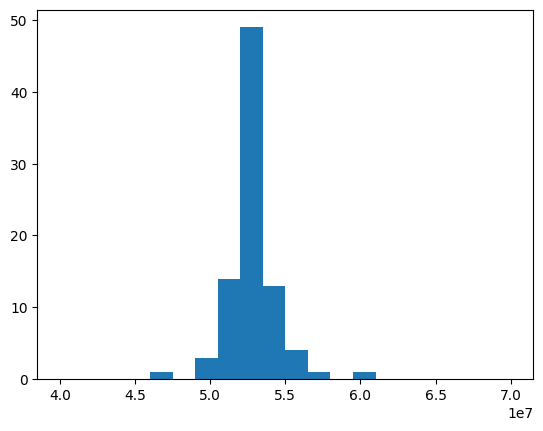

In [14]:
plt.hist(rtt_list_process_time_ns, range=[40000000,70000000], bins=20)

In [ ]:
plt.hist(rtt_list_perf_counter_ns, range=[0,10000000], bins=20)